# AIR QUALITY AND HEALTH IMPACT 

**IMPORT LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

**LOAD DATA**

In [3]:
df = pd.read_csv('air_quality_health_impact_data.csv')

**EXPLORATORY DATA ANALYSIS**

In [5]:
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [6]:
df.shape

(5811, 15)

In [7]:
df.isnull().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

In [10]:
df.corr()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
RecordID,1.000000,-0.003768,0.022260,0.022816,0.010694,-0.021524,-0.000874,0.004080,-0.001449,0.018529,-0.014545,-0.030537,-0.008299,0.015786,0.198229
AQI,-0.003768,1.000000,0.023127,0.005890,0.007836,-0.006644,0.002339,0.004185,-0.004217,-0.018816,0.009302,0.009158,-0.013592,0.614560,-0.348106
PM10,0.022260,0.023127,1.000000,-0.012193,0.008487,-0.007177,-0.004411,-0.017561,-0.017290,-0.018959,-0.001315,0.015582,-0.009076,0.182600,-0.108271
PM2_5,0.022816,0.005890,-0.012193,1.000000,0.005564,0.015894,0.006070,-0.001978,0.006720,0.009041,0.025244,0.017312,-0.023123,0.220347,-0.152407
NO2,0.010694,0.007836,0.008487,0.005564,1.000000,-0.019979,-0.014910,0.006971,-0.011100,-0.001398,0.019849,-0.005012,-0.002859,0.124435,-0.090387
SO2,-0.021524,-0.006644,-0.007177,0.015894,-0.019979,1.000000,-0.004319,-0.022458,0.000910,-0.001617,0.011130,-0.002672,-0.010546,0.015535,-0.008364
O3,-0.000874,0.002339,-0.004411,0.006070,-0.014910,-0.004319,1.000000,-0.001257,0.003982,-0.002596,-0.010068,0.001753,-0.014293,0.157940,-0.110093
Temperature,0.004080,0.004185,-0.017561,-0.001978,0.006971,-0.022458,-0.001257,1.000000,-0.000233,0.000887,0.009394,0.009249,0.007943,-0.010556,0.005969
Humidity,-0.001449,-0.004217,-0.017290,0.006720,-0.011100,0.000910,0.003982,-0.000233,1.000000,0.021027,0.008691,-0.024617,-0.004865,0.000662,-0.006715
WindSpeed,0.018529,-0.018816,-0.018959,0.009041,-0.001398,-0.001617,-0.002596,0.000887,0.021027,1.000000,-0.010553,0.003715,-0.006454,-0.025447,0.005999


In [11]:
df.dtypes

RecordID                 int64
AQI                    float64
PM10                   float64
PM2_5                  float64
NO2                    float64
SO2                    float64
O3                     float64
Temperature            float64
Humidity               float64
WindSpeed              float64
RespiratoryCases         int64
CardiovascularCases      int64
HospitalAdmissions       int64
HealthImpactScore      float64
HealthImpactClass      float64
dtype: object

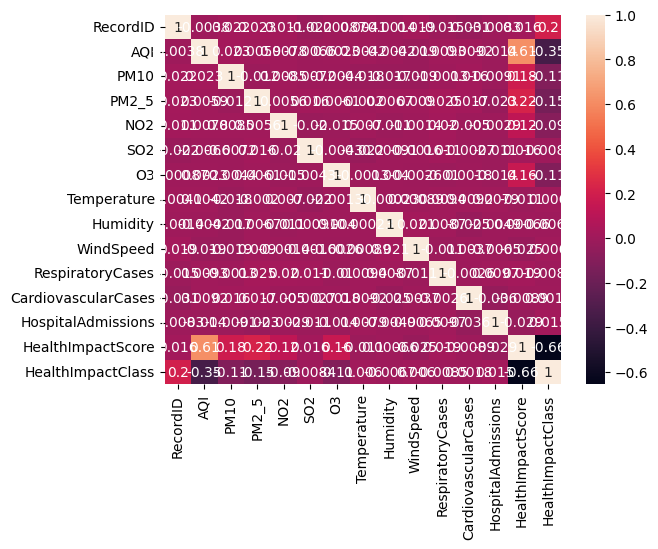

In [12]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**SPLITING DATA**

In [14]:
x = df.drop('HealthImpactClass',axis=1)
y = df['HealthImpactClass']

In [15]:
x.shape

(5811, 14)

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state=2)

**MODEL BUILDING**

In [18]:
import tensorflow as tf 
from tensorflow import keras

In [19]:
model = keras.Sequential([
    keras.layers.Dense(90,input_dim=14,activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(45,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')])

In [20]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
H = model.fit(x_train,y_train,epochs =100,batch_size = 8 , validation_split=0.3)

Epoch 1/100
356/356 [==============================] - 5s 6ms/step - loss: 0.5592 - accuracy: 0.7537 - val_loss: 0.5517 - val_accuracy: 0.8157
Epoch 2/100
356/356 [==============================] - 2s 5ms/step - loss: 0.4338 - accuracy: 0.7470 - val_loss: 0.2834 - val_accuracy: 0.8026
Epoch 3/100
356/356 [==============================] - 2s 5ms/step - loss: 0.4383 - accuracy: 0.7294 - val_loss: 0.3109 - val_accuracy: 0.6790
Epoch 4/100
356/356 [==============================] - 2s 5ms/step - loss: 0.3227 - accuracy: 0.7706 - val_loss: 0.6084 - val_accuracy: 0.8337
Epoch 5/100
356/356 [==============================] - 2s 5ms/step - loss: 0.3277 - accuracy: 0.8064 - val_loss: 0.2191 - val_accuracy: 0.8354
Epoch 6/100
356/356 [==============================] - 2s 5ms/step - loss: 0.2799 - accuracy: 0.7822 - val_loss: 0.3409 - val_accuracy: 0.8280
Epoch 7/100
356/356 [==============================] - 2s 5ms/step - loss: 0.6033 - accuracy: 0.7779 - val_loss: -0.0082 - val_accuracy: 0.827

In [22]:
loss , acc  = model.evaluate( x_test,y_test)
print('Test Accuracy : ',acc*100)

55/55 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8131
Test Accuracy :  81.30733966827393


In [23]:
loss , acc  = model.evaluate( x_train,y_train)
print('Test Accuracy : ',acc*100)

128/128 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8335
Test Accuracy :  83.35382342338562


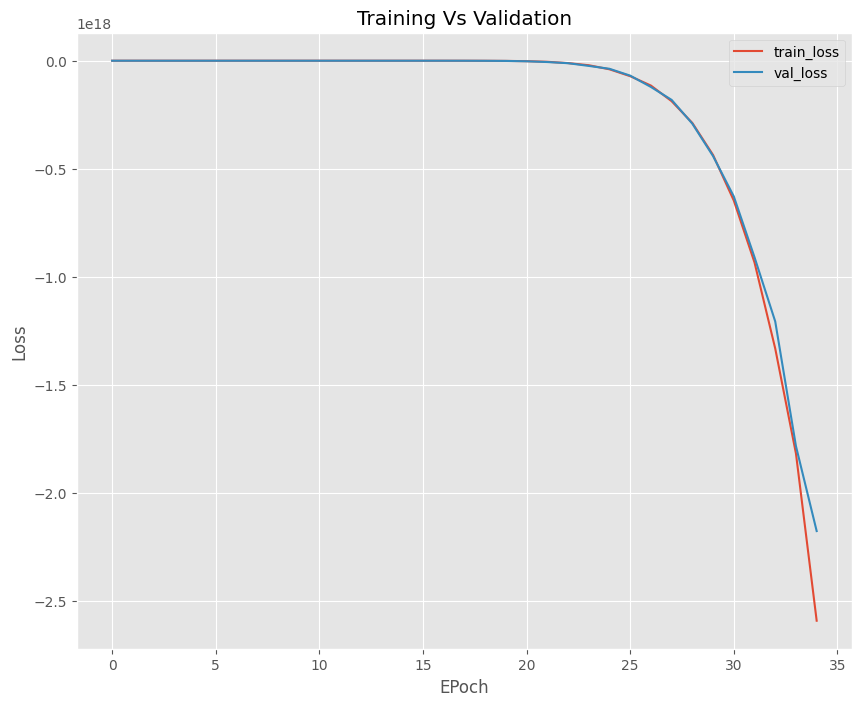

In [24]:
import matplotlib.pyplot as plt 

epochs = np.arange(0,len(H.history['loss']))
plt.figure(figsize = (10,8))
plt.style.use('ggplot')

plt.style.use('ggplot')
plt.plot(epochs,H.history['loss'],label='train_loss')
plt.plot(epochs,H.history['val_loss'],label='val_loss')
plt.title("Training Vs Validation")
plt.xlabel('EPoch')
plt.ylabel("Loss")
plt.legend()